<a href="https://colab.research.google.com/github/ginzburg1991/resume_parser_ai/blob/main/Resume_Parser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install nltk
!pip install pandas
!pip install xgboost

In [38]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
import nltk
import xgboost as xgb
nltk.download('punkt')


file_path = 'UpdatedResumeDataSet.csv'
resume_dataset = pd.read_csv(file_path)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


lemmatizer = WordNetLemmatizer()


def preprocess_text_nltk(text):
    # Lowercasing
    text = text.lower()

    text = re.sub(r'[\r\n]', ' ', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)

    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)


resume_dataset['Cleaned_Resume'] = resume_dataset['Resume'].apply(preprocess_text_nltk)


resume_dataset[['Category', 'Cleaned_Resume']].head(963)




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Category,Cleaned_Resume
0,Data Science,skill programming language python panda numpy ...
1,Data Science,education detail may may uitrgpv data scientis...
2,Data Science,area interest deep learning control system des...
3,Data Science,skill r python sap hana tableau sap hana sql s...
4,Data Science,education detail mca ymcaust faridabad haryana...
...,...,...
957,Testing,computer skill proficient m office word basic ...
958,Testing,willingness accept challenge positive thinking...
959,Testing,personal skill quick learner eagerness learn n...
960,Testing,computer skill software knowledge mspower poin...


In [26]:
print(resume_dataset.isnull().sum())

Category          0
Resume            0
Cleaned_Resume    0
dtype: int64


In [27]:
resume_dataset.shape

(962, 3)

In [28]:
unique_resumes_count = resume_dataset['Category'].nunique()
print(f"Number of different resumes: {unique_resumes_count}")

Number of different resumes: 25


In [29]:
unique_resumes_name = resume_dataset['Category'].unique()
print(f"Number of different resumes: {unique_resumes_name}")

Number of different resumes: ['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [30]:

resume_counts = resume_dataset['Category'].value_counts()

print("Number of resumes associated with each unique value in the first column:")
print(resume_counts)

Number of resumes associated with each unique value in the first column:
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer



vectorizer = TfidfVectorizer(max_features=100)
print("TF-IDF Vectorizer initialized.")


tfidf_matrix = vectorizer.fit_transform(resume_dataset['Cleaned_Resume'])
print("TF-IDF transformation completed.")


print(f"Shape of TF-IDF Matrix: {tfidf_matrix.shape}")


feature_names = vectorizer.get_feature_names_out()
tfidf_dataframe = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
print("TF-IDF Matrix converted to DataFrame.")


print("First few rows of the TF-IDF DataFrame:")
print(tfidf_dataframe.head())


TF-IDF Vectorizer initialized.
TF-IDF transformation completed.
Shape of TF-IDF Matrix: (962, 100)
TF-IDF Matrix converted to DataFrame.
First few rows of the TF-IDF DataFrame:
   activity  analysis  application  automation     based  business    client  \
0  0.000000  0.409704     0.000000         0.0  0.045762  0.000000  0.081279   
1  0.000000  0.000000     0.000000         0.0  0.000000  0.091782  0.000000   
2  0.065150  0.066807     0.000000         0.0  0.119392  0.058228  0.000000   
3  0.108583  0.111346     0.022475         0.0  0.024874  0.072786  0.066268   
4  0.000000  0.108198     0.000000         0.0  0.000000  0.000000  0.000000   

   college   company  computer  ...      used      user     using   various  \
0  0.00000  0.021806  0.043444  ...  0.055647  0.153118  0.043690  0.045425   
1  0.00000  0.089675  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
2  0.00000  0.028446  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
3  0.02275  0.011852  0.00

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


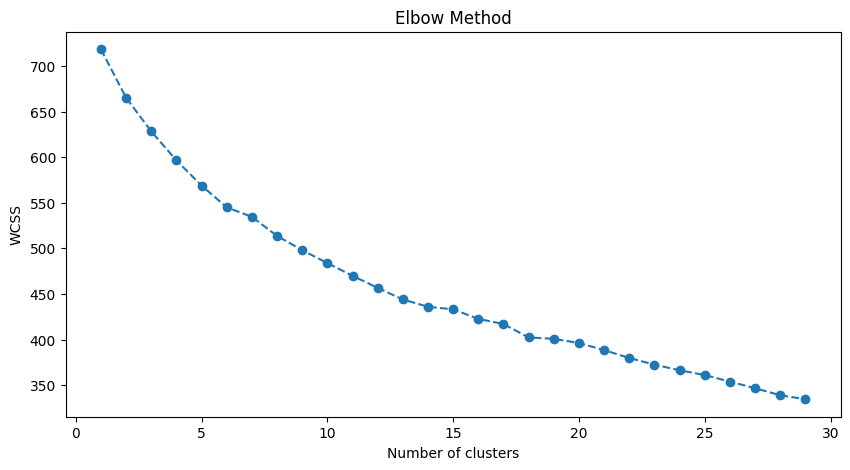

In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Graph
plt.figure(figsize=(10,5))
plt.plot(range(1, 30), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# k = 166

# # Apply K-Means Clustering
# kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
# cluster_labels = kmeans.fit_predict(tfidf_matrix)

# # Add the cluster labels to your original DataFrame
# resume_dataset['Cluster'] = cluster_labels

# # Now you can analyze the resumes in each cluster


In [33]:
# Choose the number of clusters (k) based on the elbow graph
k = 120

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(tfidf_matrix)

# Add the cluster labels to your original DataFrame
resume_dataset['Cluster'] = cluster_labels

# Now you can analyze the resumes in each cluster

for cluster_num in range(k):
    print(f"Resumes in Cluster {cluster_num}:")
    print(resume_dataset[resume_dataset['Cluster'] == cluster_num])
    print("\n")

Resumes in Cluster 0:
     Category                                             Resume  \
92   Advocate  Good grasping quality and skillful work Educat...   
102  Advocate  Good grasping quality and skillful work Educat...   

                                        Cleaned_Resume  Cluster  
92   good grasping quality skillful work education ...        0  
102  good grasping quality skillful work education ...        0  


Resumes in Cluster 1:
         Category                                             Resume  \
3    Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   
13   Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   
23   Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   
33   Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   
746        Hadoop  Technical Skill Set: Programming Languages Apa...   
753        Hadoop  Technical Skill Set: Programming Languages Apa...   
760        Hadoop  Technical Skill Set: Program

In [34]:


job_category_skills = {
    'Data Science': [
        'BS Computer Science', 'data aggrefation', 'statistical', 'math', 'communicate', 'SQL', 'data analysis', 'python'
    ],
    'Engineering': ['engineering', 'design', 'project management', 'team'],

}


def calculate_score_tf_idf_no_duplicates(tfidf_row, category_skills):
    score = 0
    skills_found = 0

    for skill in category_skills:
        if skill in tfidf_row.index and tfidf_row[skill] > 0:
            if skills_found < len(category_skills):  # Count each skill only once
                score += tfidf_row[skill]
                skills_found += 1
                print(f"Found skill '{skill}' with score {tfidf_row[skill]}")
            else:
                print(f"Skill '{skill}' already counted")
        else:
            print(f"Skill '{skill}' not found")

    # Normalize the score based on the number of skills found
    normalized_score = (score / skills_found) * 100 if skills_found > 0 else 0
    return normalized_score

# Example usage
# my_resume_tfidf_row = ...  # Pandas Series from the TF-IDF vector of a resume
# job_category_skills = ...  # Dictionary of skills for each category
# score = calculate_score_tf_idf_no_duplicates(my_resume_tfidf_row, job_category_skills['Data Science'])
# print(f"Normalized Score: {score}")




data_science_scores = tfidf_dataframe.apply(lambda row: calculate_score_tf_idf_no_duplicates(row, job_category_skills['Data Science']), axis=1)


max_score = data_science_scores.max()
normalized_scores = (data_science_scores / max_score) * 100


resume_dataset['DataScience_Score'] = normalized_scores


print(resume_dataset[['Category', 'DataScience_Score']].head(595))


Streaming output truncated to the last 5000 lines.
Skill 'data analysis' not found
Skill 'python' not found
Skill 'BS Computer Science' not found
Skill 'data aggrefation' not found
Skill 'statistical' not found
Skill 'math' not found
Skill 'communicate' not found
Skill 'SQL' not found
Skill 'data analysis' not found
Skill 'python' not found
Skill 'BS Computer Science' not found
Skill 'data aggrefation' not found
Skill 'statistical' not found
Skill 'math' not found
Skill 'communicate' not found
Skill 'SQL' not found
Skill 'data analysis' not found
Skill 'python' not found
Skill 'BS Computer Science' not found
Skill 'data aggrefation' not found
Skill 'statistical' not found
Skill 'math' not found
Skill 'communicate' not found
Skill 'SQL' not found
Skill 'data analysis' not found
Skill 'python' not found
Skill 'BS Computer Science' not found
Skill 'data aggrefation' not found
Skill 'statistical' not found
Skill 'math' not found
Skill 'communicate' not found
Skill 'SQL' not found
Skill 'da

In [35]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

dense_tfidf_matrix = tfidf_matrix.toarray()

silhouette_avg = silhouette_score(dense_tfidf_matrix, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

calinski_harabasz = calinski_harabasz_score(dense_tfidf_matrix, cluster_labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

davies_bouldin = davies_bouldin_score(dense_tfidf_matrix, cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")



Silhouette Score: 0.8340095367123582
Calinski-Harabasz Index: 110.86635037517557
Davies-Bouldin Index: 0.5740066848256452


In [36]:

my_resume = """data science machine dsadsa dsaads dasasd sda ads python data"""


preprocessed_resume = preprocess_text_nltk(my_resume)
print("Preprocessed Resume:", preprocessed_resume)


my_resume_tfidf = vectorizer.transform([preprocessed_resume])
print("TF-IDF Vector for the Resume:", my_resume_tfidf.toarray())


print("Feature Names from TF-IDF Vectorizer:", vectorizer.get_feature_names_out())

def calculate_score_tf_idf_no_duplicates(tfidf_row, category_skills):
    score = 0
    skills_counted = set()  # To keep track of skills already counted

    for skill in category_skills:
        if skill in tfidf_row.index and tfidf_row[skill] > 0 and skill not in skills_counted:
            score += tfidf_row[skill]
            skills_counted.add(skill)
            print(f"Found skill '{skill}' with score {tfidf_row[skill]}")
        elif skill not in tfidf_row.index or tfidf_row[skill] <= 0:
            print(f"Skill '{skill}' not found")

    # Normalize the score based on the number of unique skills found
    normalized_score = (score / len(skills_counted)) * 100 if skills_counted else 0
    return normalized_score


    # Normalize the score based on the total number of skills
    normalized_score = (score / len(category_skills)) * 100 if category_skills else 0
    return normalized_score

# Applying the fixed scoring function
my_resume_tfidf_vector = vectorizer.transform([preprocessed_resume]).toarray()[0]
my_resume_tfidf_row = pd.Series(my_resume_tfidf_vector, index=vectorizer.get_feature_names_out())
my_resume_score = calculate_score_tf_idf_no_duplicates(my_resume_tfidf_row, job_category_skills['Data Science'])
print(f"Resume Score for Data Science: {my_resume_score}")



Preprocessed Resume: data science machine dsadsa dsaads dasasd sda ad python data
TF-IDF Vector for the Resume: [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.70907087 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.5212823  0.
  0.         0.         0.         0.         0.         0.47485078
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.   

In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report



# Encode the 'Category' labels into numerical format
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(resume_dataset['Category'])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, encoded_labels, test_size=0.2, random_state=42)

# Initialize XGBoost classifier

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Model Accuracy: {accuracy}")

classification_metrics = classification_report(y_test, y_pred)
print(classification_metrics)


XGBoost Model Accuracy: 0.9844559585492227
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       0.80      1.00      0.89         4
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       0.86      1.00      0.92        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        15
          16       1.00      1.00     

In [41]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'tfidf_matrix' is your feature matrix and 'encoded_labels' are your encoded category labels
# tfidf_matrix = ...  # your TF-IDF feature matrix
# encoded_labels = ...  # your category labels or scores

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, encoded_labels, test_size=0.2, random_state=42)

# Initialize Support Vector Classifier
svm_clf = SVC()

# Train the classifier
svm_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_clf.predict(X_test)

# Evaluate the model's accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Model Accuracy: {accuracy_svm}")

# Calculate and display precision, recall, and F1-score
classification_metrics_svm = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:")
print(classification_metrics_svm)


SVM Model Accuracy: 0.9948186528497409
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       0.80      1.00      0.89         4
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        15
          16   